In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --坐标--
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [3]:
# --创建输入和正确答案数据--
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):                    # 如果y坐标在正弦曲线下方
            correct_data.append([0, 1])              # 下方的区域
        else:
            correct_data.append([1, 0])              # 上方的区域

n_data = len(correct_data)                           # 数据的数量

input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [4]:
# --各个设定值--
n_in = 2                                             # 输入层的神经元数量
n_mid = 6                                            # 中间层的神经元数量
n_out = 2                                            # 输出层的神经元数量

wb_width = 0.01                                      # 权重和偏置的扩散程度
eta = 0.1                                            # 学习系数
epoch = 101
interval = 10                                       # 显示进度的间隔时间

In [5]:
# --中间层--
class MiddleLayer:
    def __init__(self, n_upper, n):                        # 初始化设置
        self.w = wb_width * np.random.randn(n_upper, n)    # 权重（矩阵）
        self.b = wb_width * np.random.randn(n)             # 偏置（向量）

    def forward(self, x):                                  # 正向传播
        self.x = x
        u = np.dot(x, self.w) + self.b                     # 中间层的净输入
        self.y = 1 / (1 + np.exp(-u))                      # sigmoid函数

    def backward(self, grad_y):                            # 反向传播
        delta = grad_y * (1-self.y) * self.y               # sigmoid函数的微分
        self.grad_w = np.dot(self.x.T, delta)              # 根据推导公式结果
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
# -- 输出层 --
class OutputLayer:
    def __init__(self, n_upper, n):  # 初始化设置
        self.w = wb_width * np.random.randn(n_upper, n)  # 权重（矩阵）
        self.b = wb_width * np.random.randn(n)  # 偏置（向量）
    
    def forward(self, x):  # 正向传播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True)  # SoftMax函数
    
    def backward(self, t):  # 反向传播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):  # 权重和偏置的更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
# -- 各个网络层的初始化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

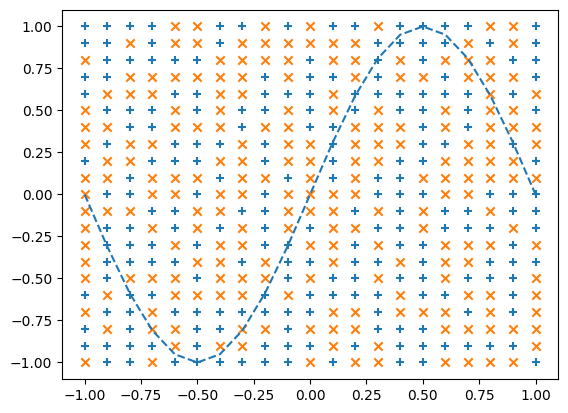

Epoch:0/101 Error:0.7353550474903158


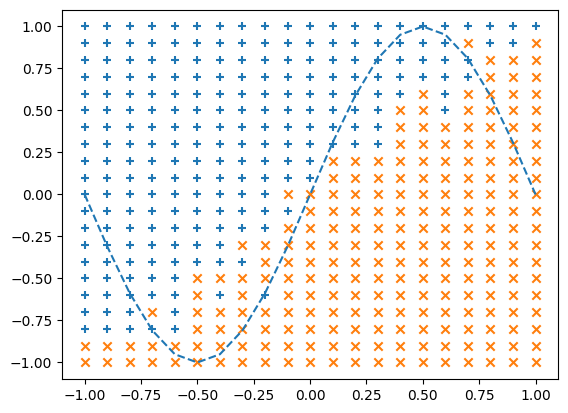

Epoch:10/101 Error:0.3610021949348717


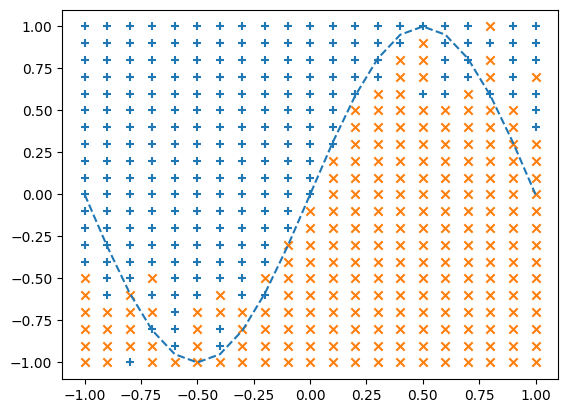

Epoch:20/101 Error:0.23053028325601468


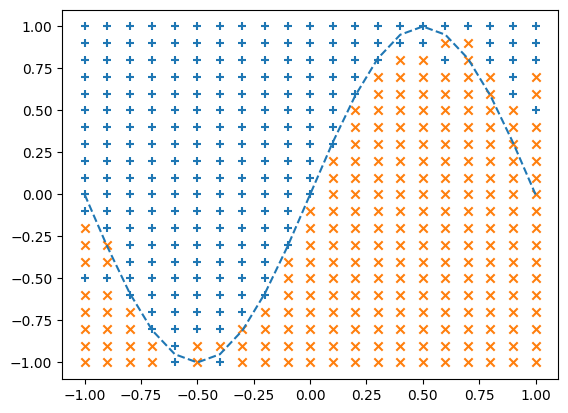

Epoch:30/101 Error:0.17012138486897854


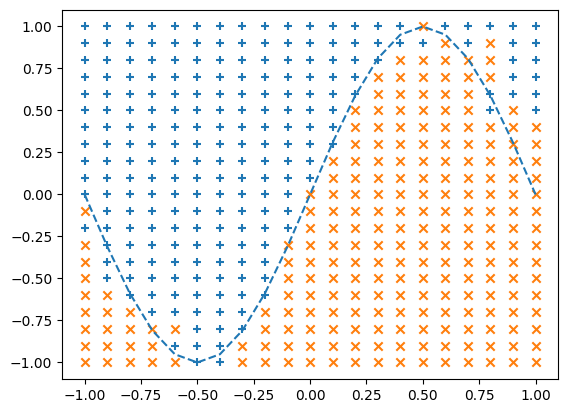

Epoch:40/101 Error:0.13643457947322354


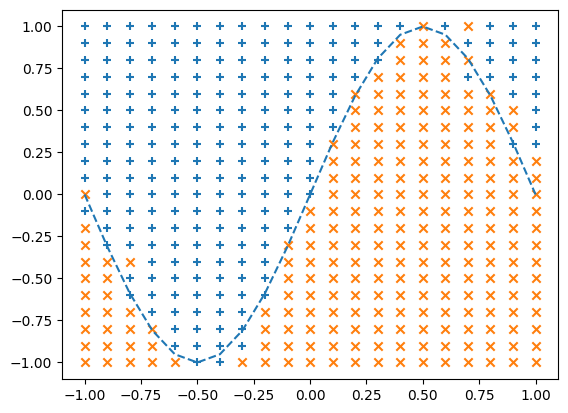

Epoch:50/101 Error:0.10557740105916279


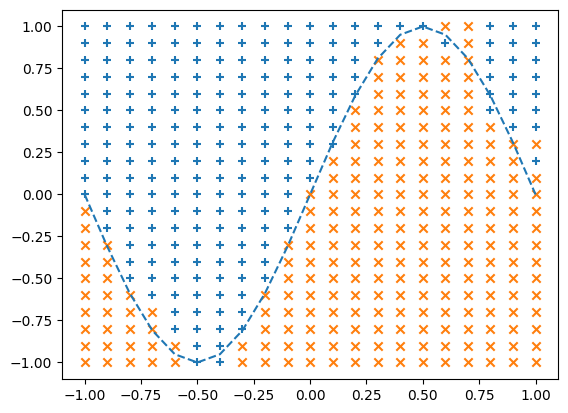

Epoch:60/101 Error:0.09790980960211594


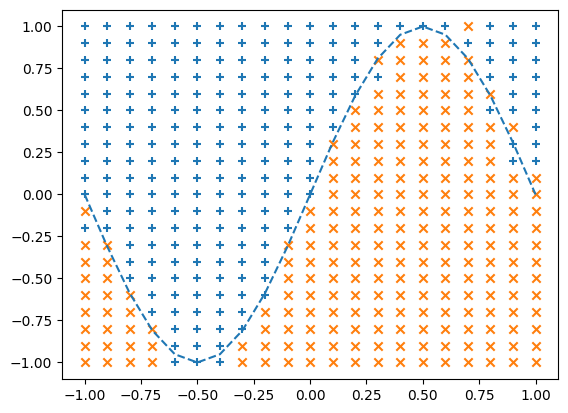

Epoch:70/101 Error:0.08218818894586033


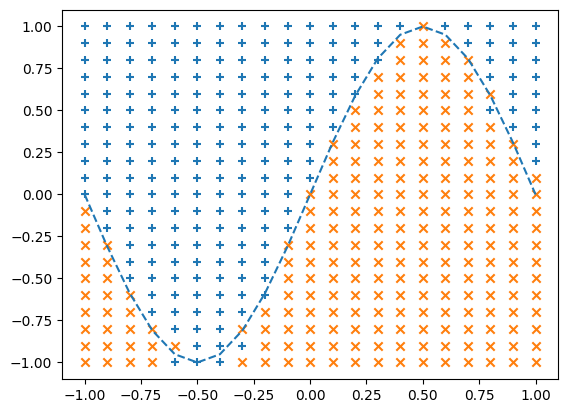

Epoch:80/101 Error:0.08574736095641063


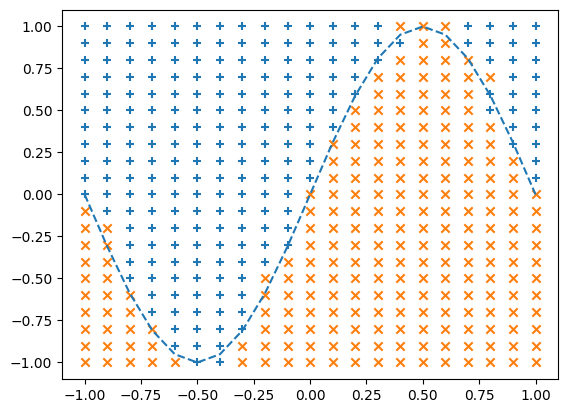

Epoch:90/101 Error:0.06799301299186264


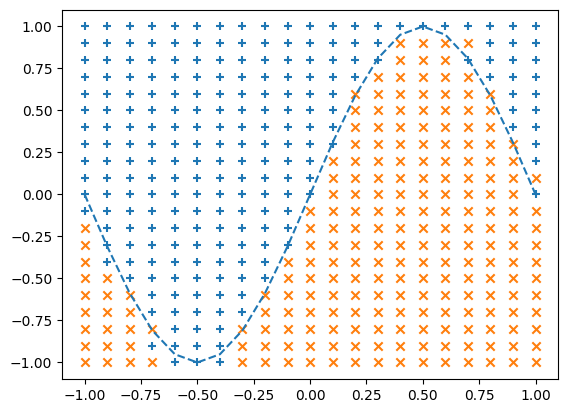

Epoch:100/101 Error:0.07364752280270502


In [8]:
# --学习--
sin_data = np.sin(np.pi*X)                                # 用于对结果的验证
for i in range(epoch):
    # 随机打乱索引值
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # 用于结果显示
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []

    for idx in index_random:
        x = input_data[idx]                         # 输入
        t = correct_data[idx]                       # 正确答案

        # 正向传播
        middle_layer.forward(x.reshape(1, 2))             # 将输入转换为矩阵
        output_layer.forward(middle_layer.y)

        # 反向传播
        output_layer.backward(t.reshape(1, 2))            # 将正确答案转换为矩阵
        middle_layer.backward(output_layer.grad_x)

        # 权重和偏置的更新
        middle_layer.update(eta)
        output_layer.update(eta)

        if i%interval == 0:
            y = output_layer.y.reshape(-1)                  # 将矩阵还原成向量
            # 误差的计算
            total_error += -np.sum(t*np.log(y +1e-7)) # 交叉熵误差
            # 对概率大小进行比较并分类
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

    if i%interval == 0:
        # 用图表显示输出
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()

        # 显示epoch次数和误差
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))